In [1]:
import pandas as pd
import seaborn as sn
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import math
from decimal import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [2]:
#pip install pandas-profiling

In [3]:
data = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', skiprows=1)

In [4]:
data.head()
#Attribute Information:
#1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations
#2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
#3. RH : Relative Humidity in %: 21 to 90
#4. Ws :Wind speed in km/h: 6 to 29
#5. Rain: total day in mm: 0 to 16.8 FWI Components
#6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
#7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
#8. Drought Code (DC) index from the FWI system: 7 to 220.4
#9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
#10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
#11. Fire Weather Index (FWI) Index: 0 to 31.1
#12. Classes: two classes, namely Fire and not Fire

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [5]:
data.shape

(247, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          244 non-null    object
 13  Classes      245 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [7]:
# All columns data type is showing as object even though most of columns are having numeric data
# Need to convert them to numeric

In [8]:
# filtering out the rows with `day` value in corresponding column
data = data[data.day.str.contains('day') == False]

In [9]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [10]:
data.shape

(245, 14)

In [11]:
data.iloc[120:, :]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
126,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [12]:
data['Region']=1

In [13]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1


In [14]:
#Striping additional space in the column names
data.columns=data.columns.str.strip()

In [15]:
#Converting object columns to numeric and filling with NaN for non numeric data
num_cols=['day','month','year','Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI']
data[num_cols]=data[num_cols].apply(pd.to_numeric, errors='coerce')

In [16]:
# Applying the condition
#data.loc[data["day"] == "NaN", "day"] = 0
#loc=data.loc[data['day'].isna()].index.values[0]
#data=data.dropna()
#data.loc[pd.isna(data["day"]), :].index
loc=data.loc[data['day'].isna()].index.values[0]
loc

123

In [17]:
data.loc[loc:, :]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
125,1.0,6.0,2012.0,32.0,71.0,12.0,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1
126,2.0,6.0,2012.0,30.0,73.0,13.0,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1
127,3.0,6.0,2012.0,29.0,80.0,14.0,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1
128,4.0,6.0,2012.0,30.0,64.0,14.0,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26.0,9.0,2012.0,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
243,27.0,9.0,2012.0,28.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
244,28.0,9.0,2012.0,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
245,29.0,9.0,2012.0,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [18]:
data['Region'][loc:]=0

In [19]:
data.shape

(245, 15)

In [20]:
# dropping NaN row
data.dropna(subset=['day'], how='all', inplace=True)
#data.drop(loc, axis=0, inplace=True)

In [21]:
data.shape

(244, 15)

In [22]:
#Converting to inte columns
int_cols=['day','month','year']
data[int_cols]=data[int_cols].astype('int64')

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    float64
 4   RH           244 non-null    float64
 5   Ws           244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      244 non-null    object 
 14  Region       244 non-null    int64  
dtypes: float64(10), int64(4), object(1)
memory usage: 30.5+ KB


<AxesSubplot:>

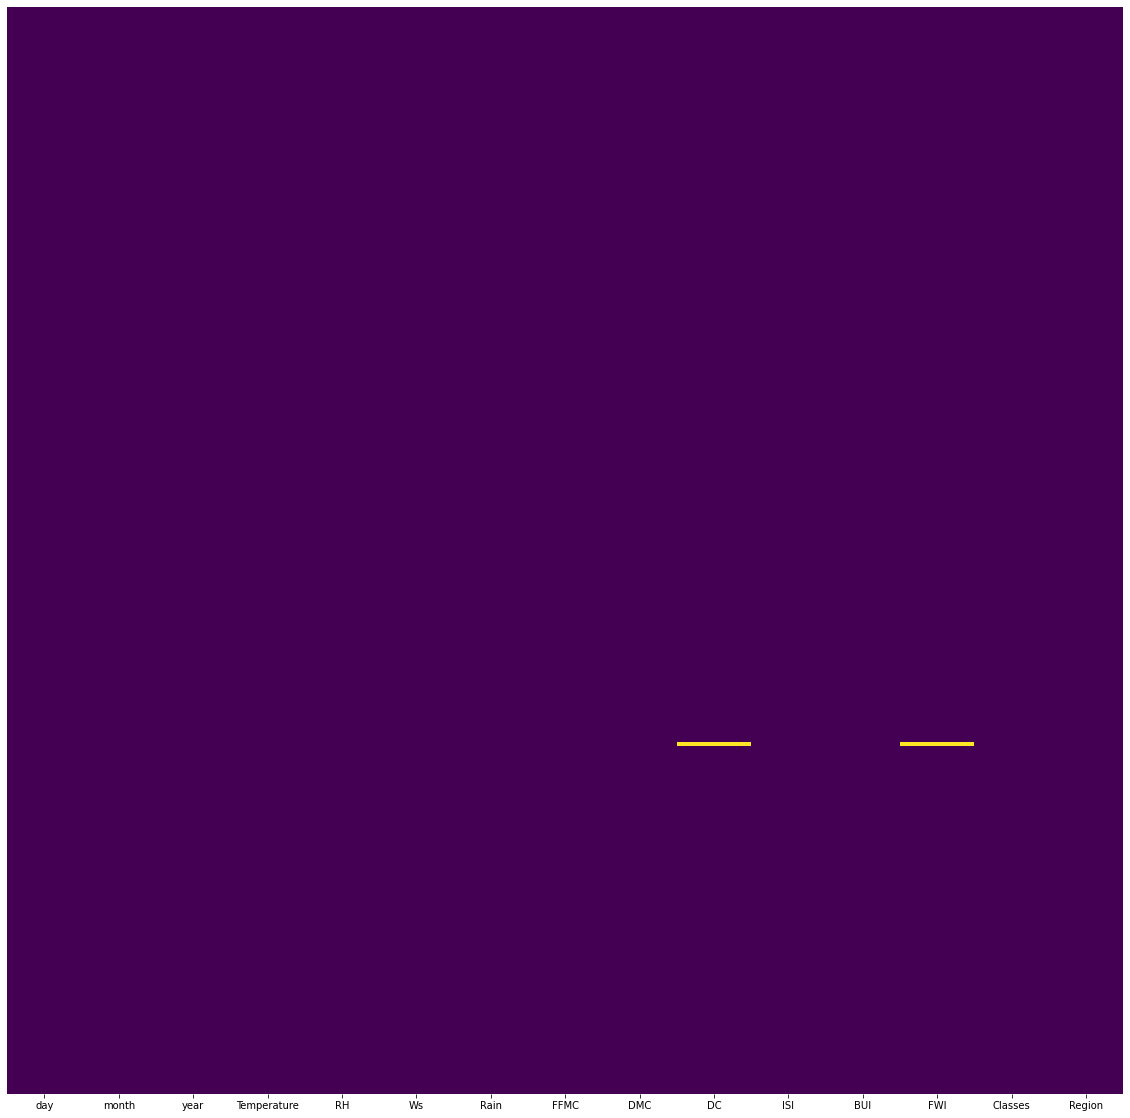

In [28]:
# Showing null values
plt.figure(figsize=(20,20))
sn.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [24]:
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             1
ISI            0
BUI            0
FWI            1
Classes        0
Region         0
dtype: int64

In [25]:
# Only columns DC and FWI are having missing values

In [26]:
for col in data.columns:
    print(col, np.round(data[col].isnull().mean(),4), "% missing values")

day 0.0 % missing values
month 0.0 % missing values
year 0.0 % missing values
Temperature 0.0 % missing values
RH 0.0 % missing values
Ws 0.0 % missing values
Rain 0.0 % missing values
FFMC 0.0 % missing values
DMC 0.0 % missing values
DC 0.0041 % missing values
ISI 0.0 % missing values
BUI 0.0 % missing values
FWI 0.0041 % missing values
Classes 0.0 % missing values
Region 0.0 % missing values


In [27]:
data[~data["FWI"].notna()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
168,14,7,2012,37.0,37.0,18.0,0.2,88.9,12.9,NaN,12.5,10.4,NaN,fire,0


In [28]:
data[~data["DC"].notna()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
168,14,7,2012,37.0,37.0,18.0,0.2,88.9,12.9,NaN,12.5,10.4,NaN,fire,0


In [29]:
data["FWI"].unique()

array([ 0.5,  0.4,  0.1,  0. ,  2.5,  7.2,  7.1,  0.3,  0.9,  5.6,  0.2,
        1.4,  2.2,  2.3,  3.8,  7.5,  8.4, 10.6, 15. , 13.9,  3.9, 12.9,
        1.7,  4.9,  6.8,  3.2,  8. ,  0.6,  3.4,  0.8,  3.6,  6. , 10.9,
        4. ,  8.8,  2.8,  2.1,  1.3,  7.3, 15.3, 11.3, 11.9, 10.7, 15.7,
        6.1,  2.6,  9.9, 11.6, 12.1,  4.2, 10.2,  6.3, 14.6, 16.1, 17.2,
       16.8, 18.4, 20.4, 22.3, 20.9, 20.3, 13.7, 13.2, 19.9, 30.2,  5.9,
        7.7,  9.7,  8.3,  0.7,  4.1,  1. ,  3.1,  1.9, 10. , 16.7,  1.2,
        5.3,  6.7,  9.5, 12. ,  6.4,  5.2,  3. ,  9.6,  4.7,  nan, 14.1,
        9.1, 13. , 17.3, 30. , 25.4, 16.3,  9. , 14.5, 13.5, 19.5, 12.6,
       12.7, 21.6, 18.8, 10.5,  5.5, 14.8, 24. , 26.3, 12.2, 18.1, 24.5,
       26.9, 31.1, 30.3, 26.1, 16. , 19.4,  2.7,  3.7, 10.3,  5.7,  9.8,
       19.3, 17.5, 15.4, 15.2,  6.5])

In [30]:
#Replacing missing value with mean
FWI_mean=data["FWI"].mean()
replace_with_mean = round(FWI_mean, 1)
data["FWI"].fillna(replace_with_mean,inplace=True)

In [31]:
data["FWI"].unique()

array([ 0.5,  0.4,  0.1,  0. ,  2.5,  7.2,  7.1,  0.3,  0.9,  5.6,  0.2,
        1.4,  2.2,  2.3,  3.8,  7.5,  8.4, 10.6, 15. , 13.9,  3.9, 12.9,
        1.7,  4.9,  6.8,  3.2,  8. ,  0.6,  3.4,  0.8,  3.6,  6. , 10.9,
        4. ,  8.8,  2.8,  2.1,  1.3,  7.3, 15.3, 11.3, 11.9, 10.7, 15.7,
        6.1,  2.6,  9.9, 11.6, 12.1,  4.2, 10.2,  6.3, 14.6, 16.1, 17.2,
       16.8, 18.4, 20.4, 22.3, 20.9, 20.3, 13.7, 13.2, 19.9, 30.2,  5.9,
        7.7,  9.7,  8.3,  0.7,  4.1,  1. ,  3.1,  1.9, 10. , 16.7,  1.2,
        5.3,  6.7,  9.5, 12. ,  6.4,  5.2,  3. ,  9.6,  4.7,  7. , 14.1,
        9.1, 13. , 17.3, 30. , 25.4, 16.3,  9. , 14.5, 13.5, 19.5, 12.6,
       12.7, 21.6, 18.8, 10.5,  5.5, 14.8, 24. , 26.3, 12.2, 18.1, 24.5,
       26.9, 31.1, 30.3, 26.1, 16. , 19.4,  2.7,  3.7, 10.3,  5.7,  9.8,
       19.3, 17.5, 15.4, 15.2,  6.5])

In [32]:
data["DC"].unique()

array([  7.6,   7.1,   6.9,  14.2,  22.2,  30.5,  38.3,  38.8,  46.3,
        54.3,  61.4,  17. ,   7.8,   7.4,   8. ,  16. ,  27.1,  31.6,
        39.5,  47.7,  55.8,  63.8,  71.8,  80.3,  88.5,  84.4,  92.8,
         8.6,   8.3,   9.2,  18.5,  27.9,  37. ,  40.4,  49.8,   9.3,
        18.7,  27.7,  37.2,  22.9,  25.5,  34.1,  43.1,  52.8,  62.1,
        71.5,  79.9,  71.3,  79.7,  88.7,  98.6, 108.5, 117.8, 127. ,
       136. , 145.7,  10.2,  10. ,  19.8,  29.7,  39.1,  48.6,  47. ,
        57. ,  67. ,  77. ,  75.1,  85.1,  94.7,  92.5,  90.4, 100.7,
       110.9, 120.9, 130.6, 141.1, 151.3, 161.5, 171.3, 181.3, 190.6,
       200.2, 210.4, 220.4, 180.4,   8.7,   7.5,   7. ,  15.7,  24. ,
        32.2,  30.1,   8.4,   8.9,  16.6,   7.3,  24.3,  33.1,  41.3,
        49.3,  57.9,  41.4,  30.4,  15.2,   7.7,  16.3,  24.9,   8.8,
         8.2,  15.4,  17.6,  26.3,  28.9,  14.7,  22.5,  37.8,  18.4,
        25.6,  34.5,  43.3,  52.4,  36.7,   8.5,  17.8,  27.3,  36.8,
        46.4,  45.1,

In [33]:
DC_mean=data["DC"].mean()
replace_with_mean = round(DC_mean, 1)
data["DC"].fillna(replace_with_mean,inplace=True)

In [34]:
data["DC"].unique()

array([  7.6,   7.1,   6.9,  14.2,  22.2,  30.5,  38.3,  38.8,  46.3,
        54.3,  61.4,  17. ,   7.8,   7.4,   8. ,  16. ,  27.1,  31.6,
        39.5,  47.7,  55.8,  63.8,  71.8,  80.3,  88.5,  84.4,  92.8,
         8.6,   8.3,   9.2,  18.5,  27.9,  37. ,  40.4,  49.8,   9.3,
        18.7,  27.7,  37.2,  22.9,  25.5,  34.1,  43.1,  52.8,  62.1,
        71.5,  79.9,  71.3,  79.7,  88.7,  98.6, 108.5, 117.8, 127. ,
       136. , 145.7,  10.2,  10. ,  19.8,  29.7,  39.1,  48.6,  47. ,
        57. ,  67. ,  77. ,  75.1,  85.1,  94.7,  92.5,  90.4, 100.7,
       110.9, 120.9, 130.6, 141.1, 151.3, 161.5, 171.3, 181.3, 190.6,
       200.2, 210.4, 220.4, 180.4,   8.7,   7.5,   7. ,  15.7,  24. ,
        32.2,  30.1,   8.4,   8.9,  16.6,   7.3,  24.3,  33.1,  41.3,
        49.3,  57.9,  41.4,  30.4,  15.2,   7.7,  16.3,  24.9,   8.8,
         8.2,  15.4,  17.6,  26.3,  28.9,  14.7,  22.5,  37.8,  18.4,
        25.6,  34.5,  43.3,  52.4,  36.7,   8.5,  17.8,  27.3,  36.8,
        46.4,  45.1,

In [35]:
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [36]:
# triming spaces in values 
data.Classes=data.Classes.str.strip()
data['DC']=data['DC'].astype('string')
data.DC=data.DC.str.strip()
data['DC']=data['DC'].astype('float64')

In [37]:
data.head(3)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1


In [38]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
day,244.0,15.754098,8.825059,1.0,8.000,16.00,23.000,31.0
month,244.0,7.500000,1.112961,6.0,7.000,7.50,8.000,9.0
year,244.0,2012.000000,0.000000,2012.0,2012.000,2012.00,2012.000,2012.0
Temperature,244.0,32.172131,3.633843,22.0,30.000,32.00,35.000,42.0
RH,244.0,61.938525,14.884200,21.0,52.000,63.00,73.250,90.0
Ws,244.0,15.504098,2.810178,6.0,14.000,15.00,17.000,29.0
Rain,244.0,0.760656,1.999406,0.0,0.000,0.00,0.500,16.8
FFMC,244.0,77.887705,14.337571,28.6,72.075,83.50,88.300,96.0
DMC,244.0,14.673361,12.368039,0.7,5.800,11.30,20.750,65.9
DC,244.0,49.430738,47.567428,6.9,13.275,33.25,68.150,220.4


In [58]:
# Droping day, month, year columns as these no impact on fire or not fire 
data_copy_nodate=data.copy()
data_copy_nodate.drop(['day', 'month','year'], axis=1,inplace=True)

In [59]:
data_copy_nodate.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.374905,0.607551,0.455504,0.564573,-0.273496
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.225617,-0.690637,-0.348587,-0.577544,0.406424
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.079003,0.015248,0.029756,0.032298,0.176829
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.297974,-0.347105,-0.299171,-0.324363,0.041080
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.506776,0.739730,0.589652,0.690274,-0.224680
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875888,0.674499,0.982073,0.875830,-0.191094
DC,0.374905,-0.225617,0.079003,-0.297974,0.506776,0.875888,1.000000,0.505027,0.941611,0.739521,0.078574
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.505027,1.000000,0.635891,0.916307,-0.268421
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.941611,0.635891,1.000000,0.857637,-0.087370
FWI,0.564573,-0.577544,0.032298,-0.324363,0.690274,0.875830,0.739521,0.916307,0.857637,1.000000,-0.196677


In [43]:
#data_copy_nodate_NO_BUI=data_copy_nodate[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
#       'FWI', 'Classes', 'Region']]

In [46]:
#Observations
#Temperature is positively associated with FFMC, DMC,DC, ISI,BUI,FWI. FFMC, ISI, FWI,DMC are 
#some what strongly correlated.
# Temperature and Humidity are inversly propotinal. 
# FFMC is strongly associated with Temperature, DMC, DC, ISI, BUI and FWI
#DMC and BUI are strongly correlated 
#DC and BUI are strongly correlated 

<AxesSubplot:>

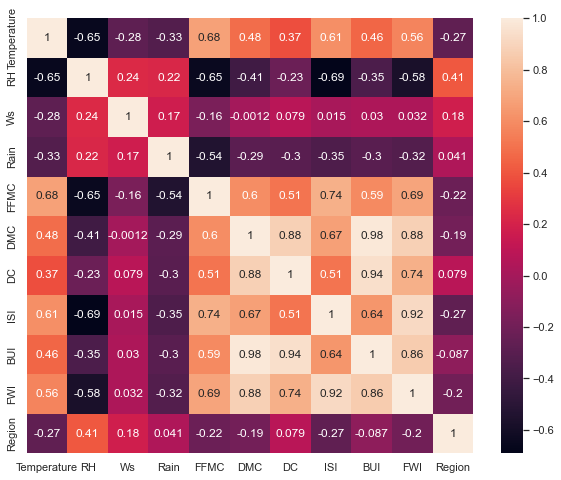

In [47]:
sn.set(rc={'figure.figsize':(10,8)})
sn.heatmap(data_copy_nodate.corr(),annot=True)

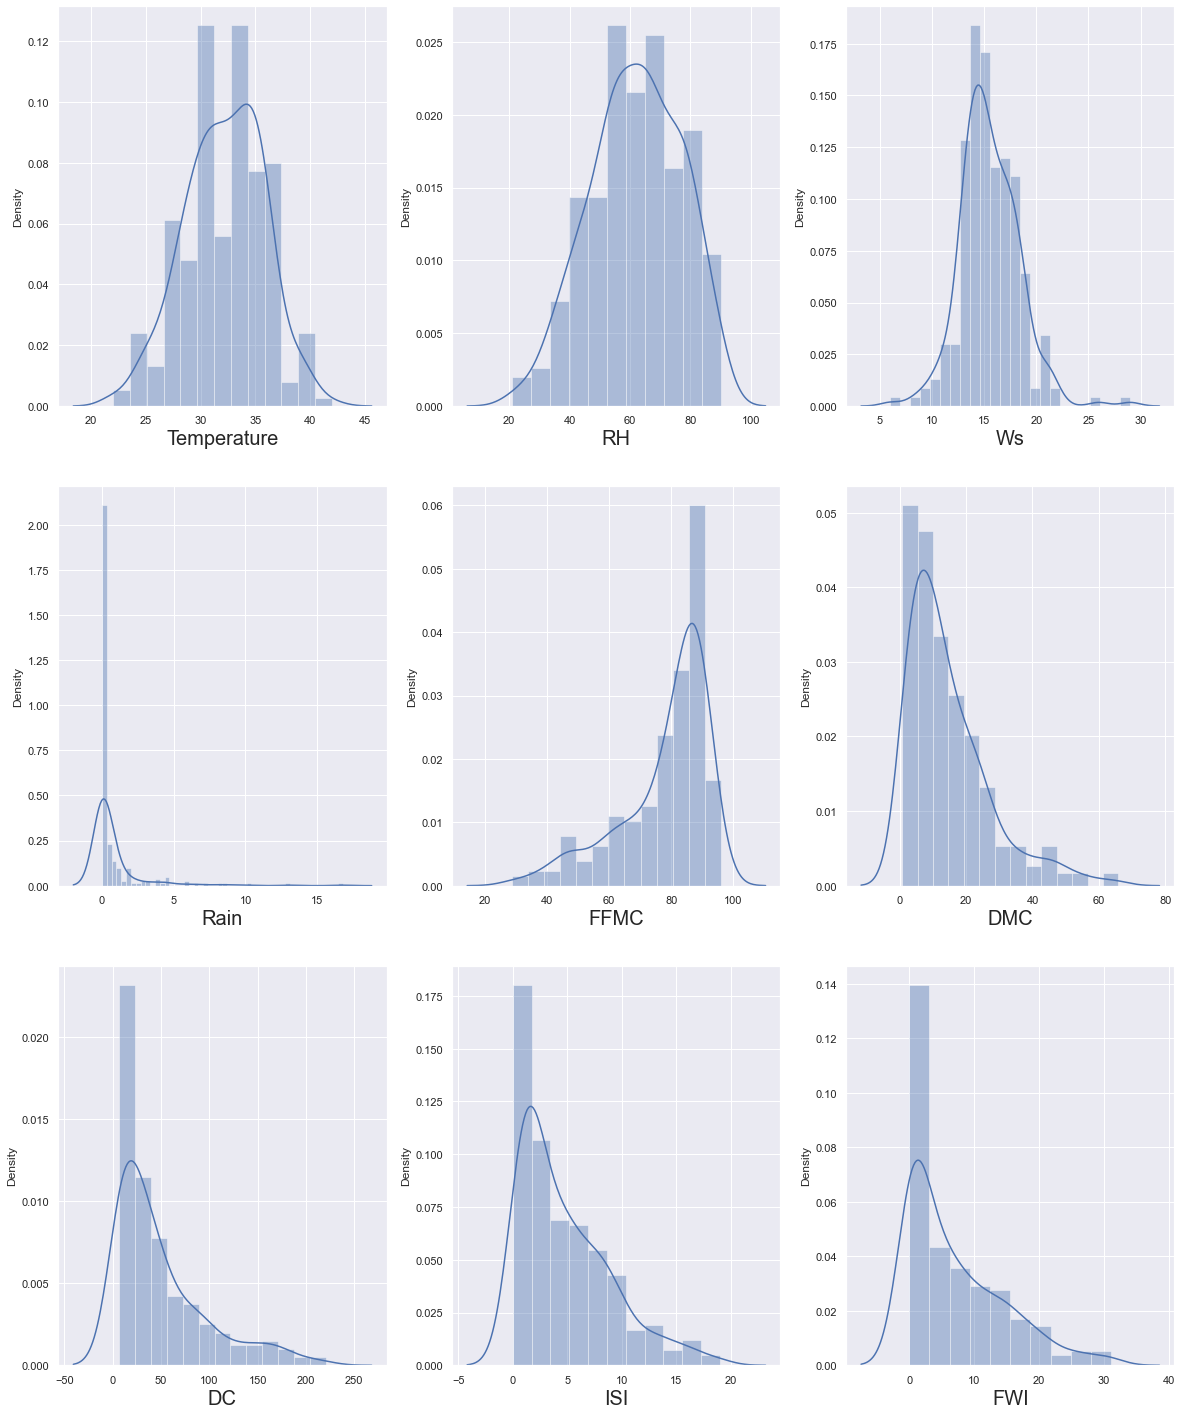

In [48]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_copy_nodate:
    if column != 'BUI':
        if plotnumber<=9 :     # as there are 9 columns in the data
            ax = plt.subplot(3,3,plotnumber)
            sn.distplot(data_copy_nodate[column])
            plt.xlabel(column,fontsize=20)
            #plt.ylabel('Salary',fontsize=20)
        plotnumber+=1
plt.show()

<AxesSubplot:xlabel='DMC', ylabel='DC'>

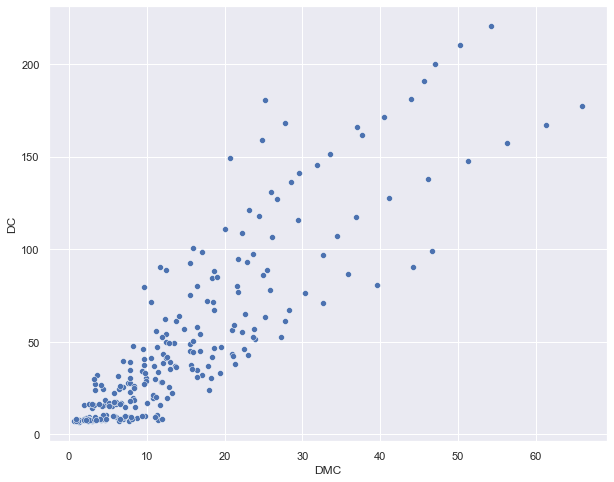

In [49]:
sn.scatterplot(x='DMC',y='DC', data=data_copy_nodate)

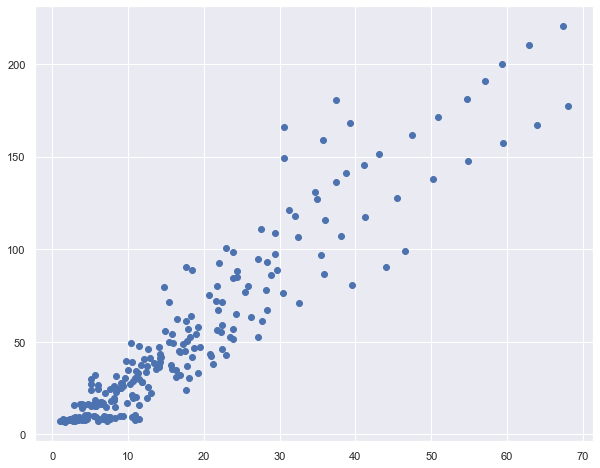

In [288]:
plt.scatter(x='BUI',y='DC', data=data_copy_nodate)

<AxesSubplot:xlabel='BUI', ylabel='DMC'>

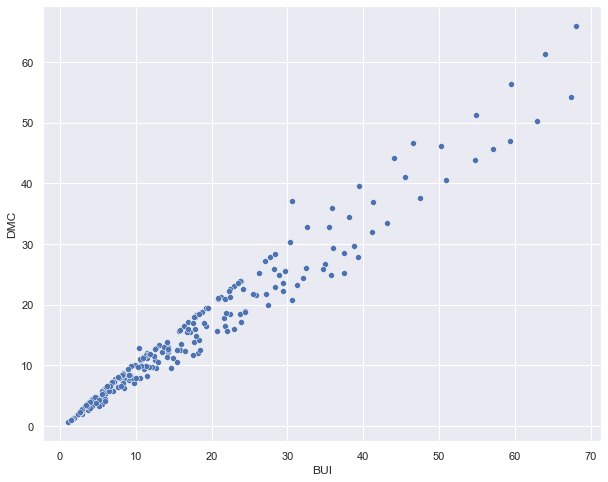

In [294]:
#plt.scatter(x='BUI',y='DMC', data=data_copy_nodate)
sn.scatterplot(x='BUI',y='DMC', data=data_copy_nodate)

In [ ]:
#BUI and DMC are correlated strongly

<AxesSubplot:xlabel='ISI', ylabel='FWI'>

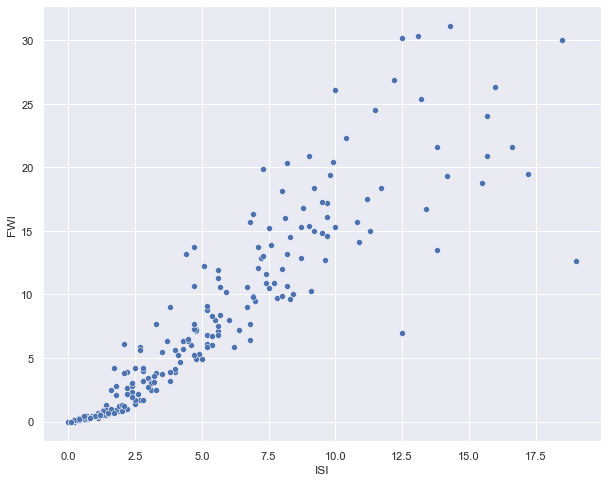

In [295]:
sn.scatterplot(x='ISI',y='FWI', data=data_copy_nodate)

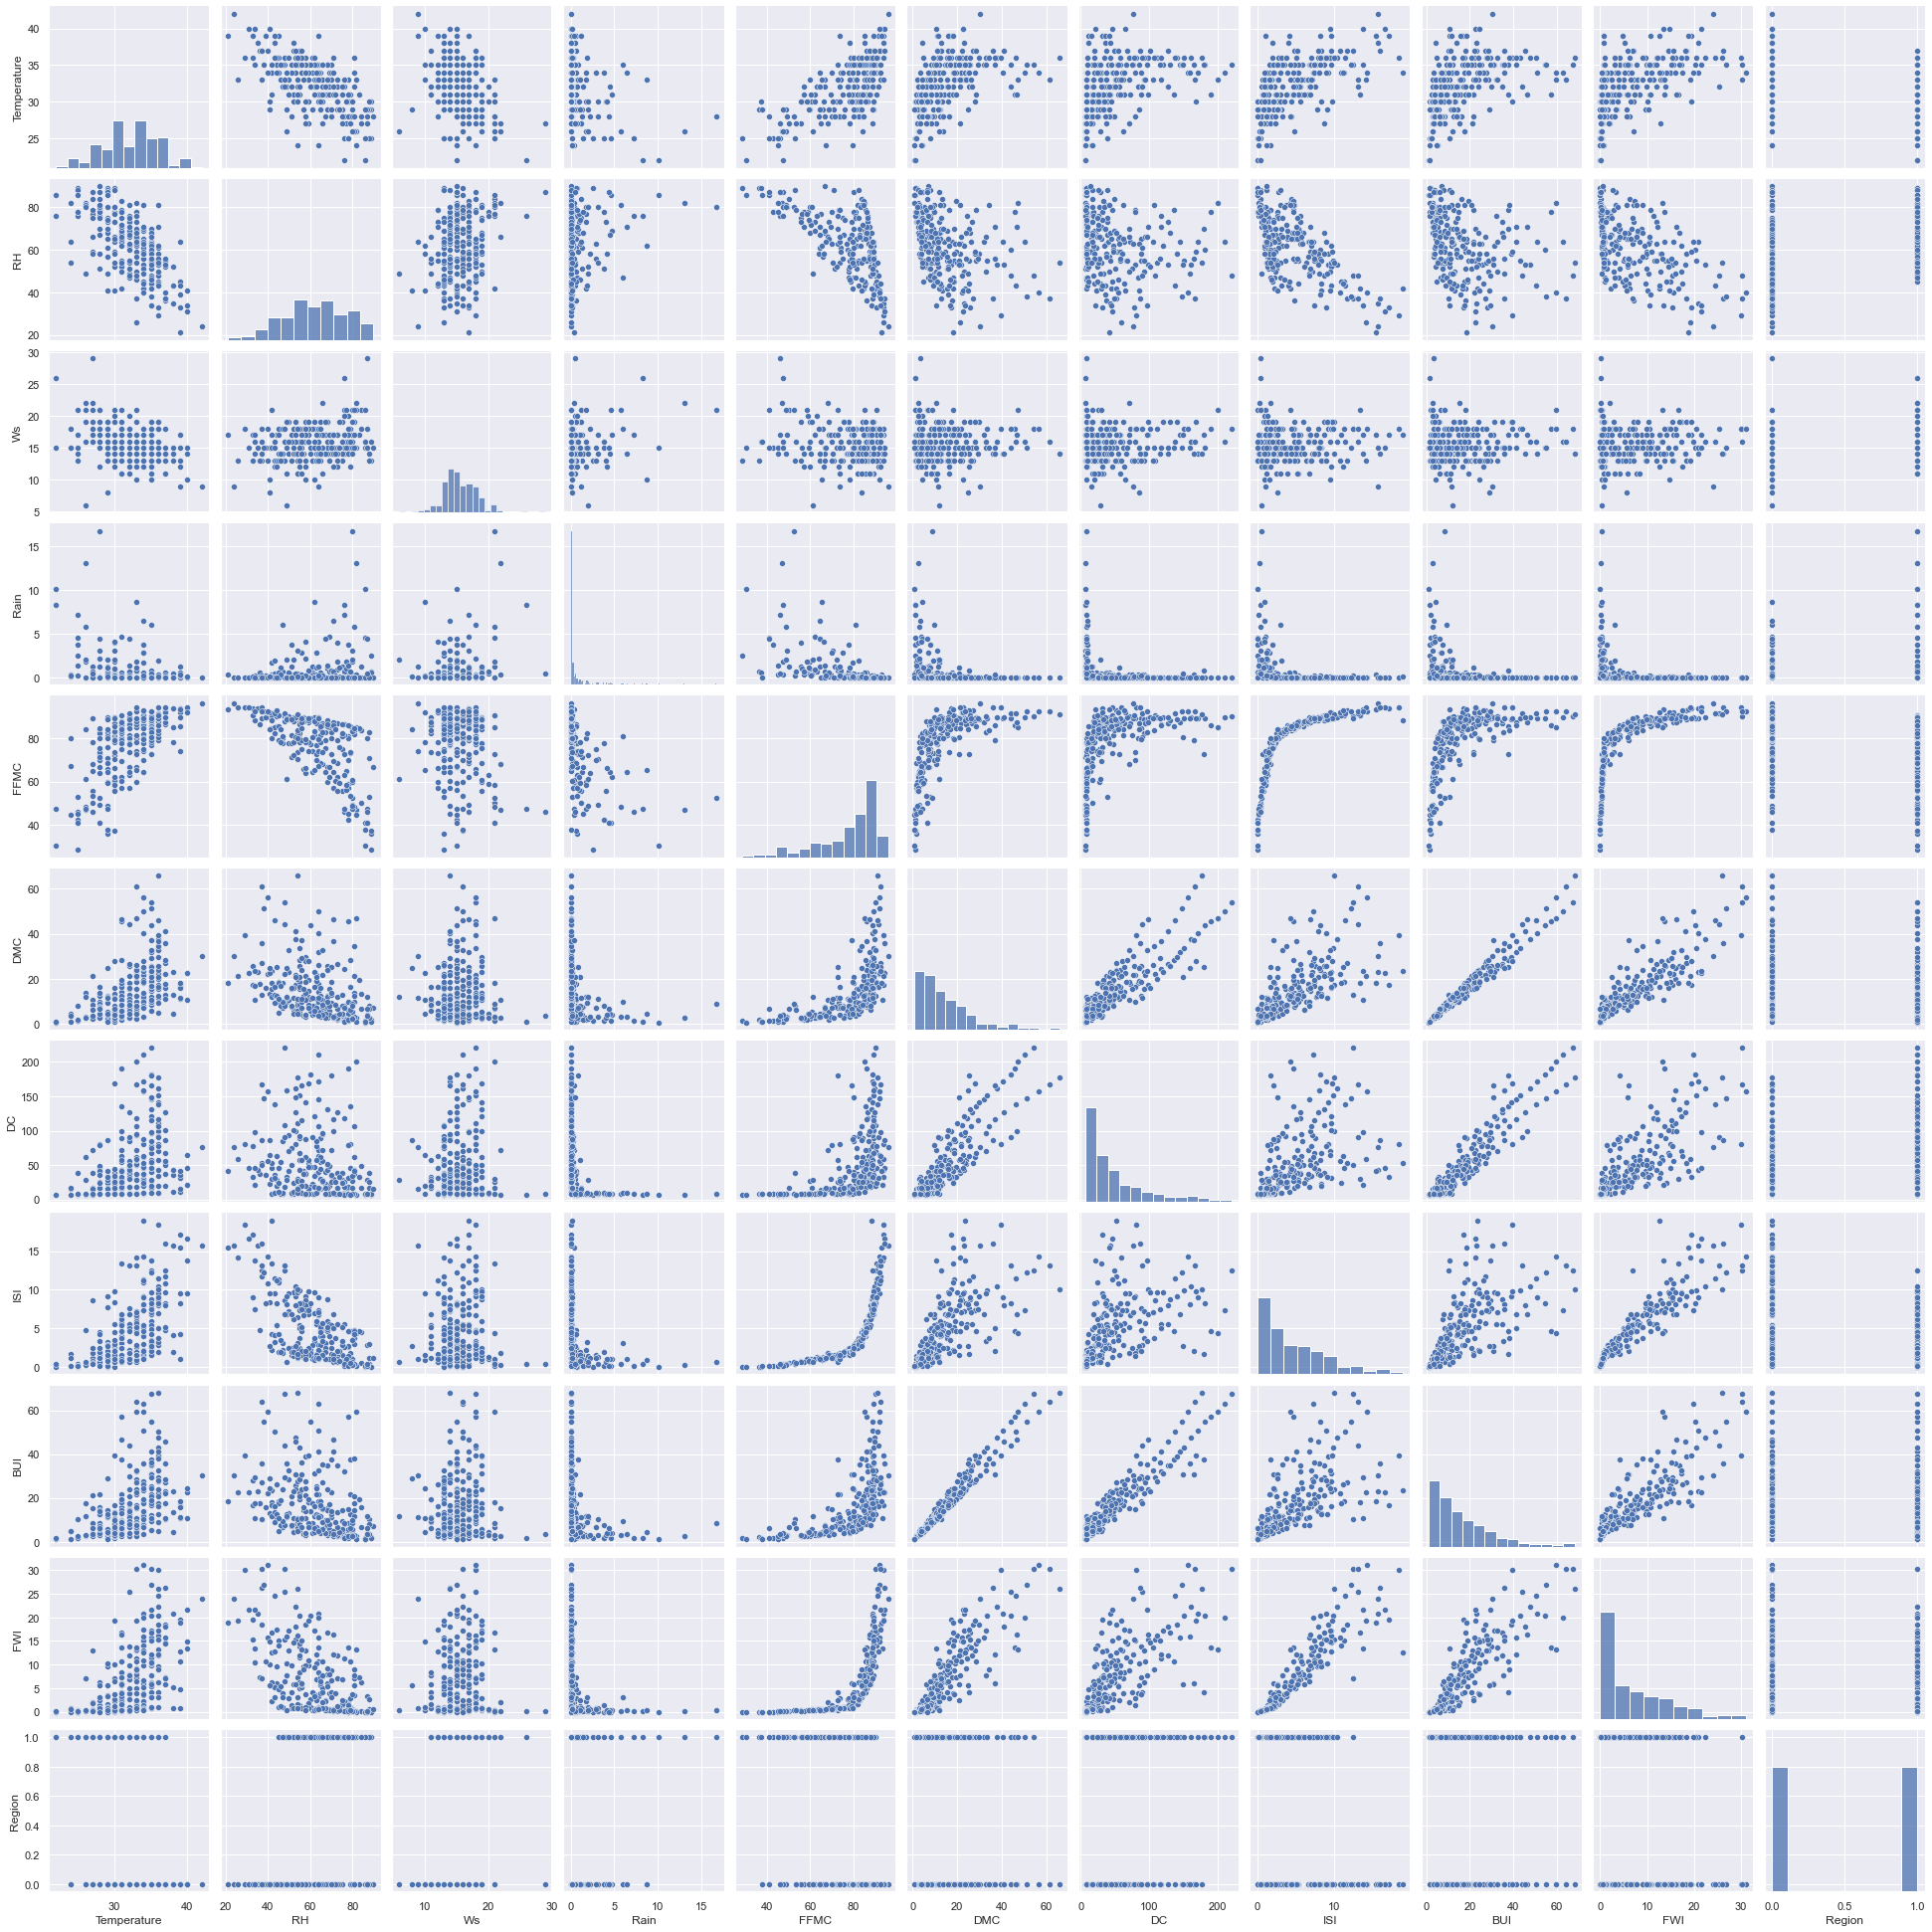

In [65]:
sn.pairplot(data=data_copy_nodate)

In [274]:
data_copy_nodate.groupby([data_copy_nodate['Classes']=='not fire']).count()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Classes,,,,,,,,,,,,
False,138,138,138,138,138,138,138,138,138,138,138,138
True,106,106,106,106,106,106,106,106,106,106,106,106


In [ ]:
# Plotting box plot for all numeric features

<AxesSubplot:>

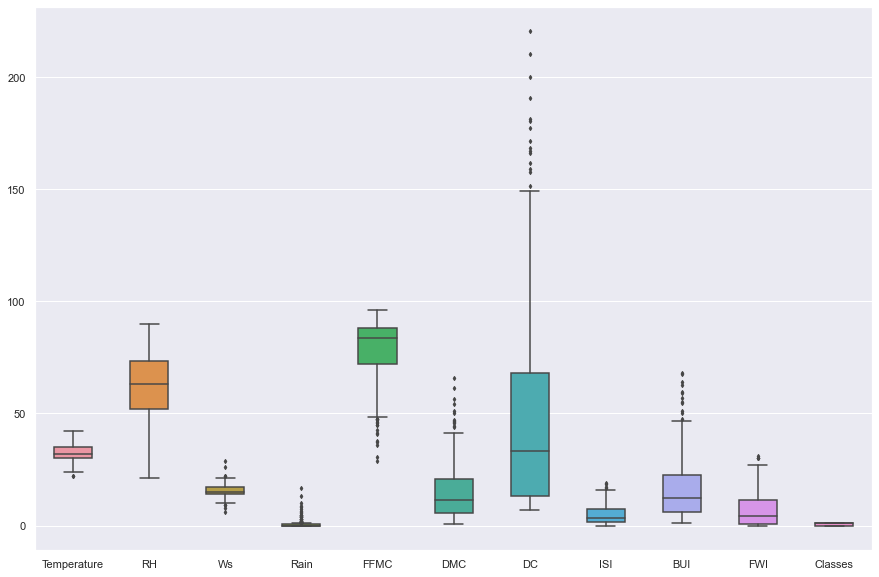

In [327]:
lst=['Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI']
#plt.figure()
#data_copy_nodate.boxplot(lst, figsize=(20,10))
fig, ax = plt.subplots(figsize=(15,10))
sn.boxplot(data=data_copy_nodate, width= 0.5,ax=ax,  fliersize=3)

In [ ]:
#Rain, FFMC, DMC, DC and BUI features have more outliers
# WS, ISI, FWI have few outliers
# Temperature feature has only one outlier
# RH features has no ouliers

<AxesSubplot:xlabel='Region', ylabel='count'>

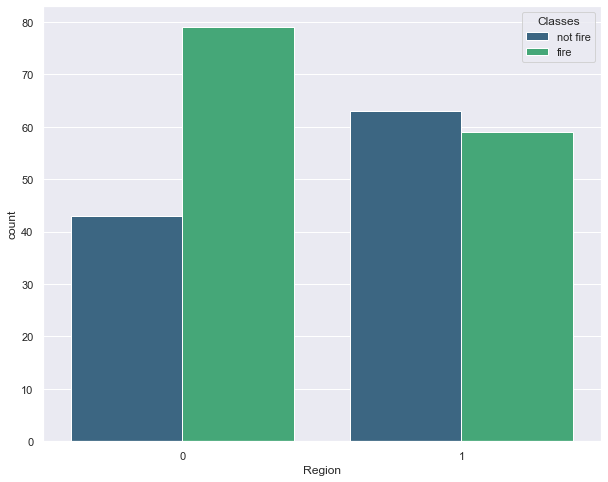

In [205]:
sn.countplot(x='Region',hue='Classes',data=data_copy_nodate,palette='viridis')

In [ ]:
#In Region Zero more fire incidents are reported.

<AxesSubplot:xlabel='Temperature', ylabel='count'>

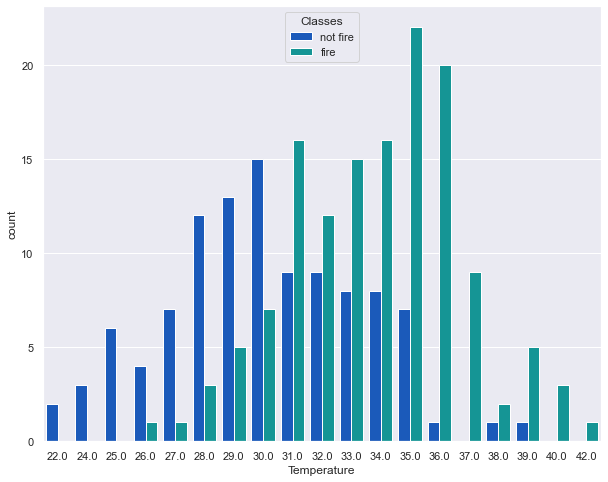

In [206]:
sn.countplot(x='Temperature',hue='Classes',data=data_copy_nodate,palette='winter')

In [ ]:
#More fire incidents reported temperatures between 29C to 37C

<AxesSubplot:xlabel='Region', ylabel='count'>

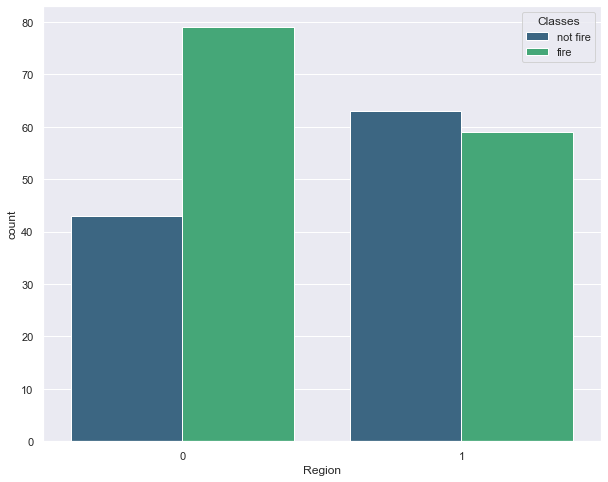

In [277]:
sn.countplot(x='Region',hue='Classes',data=data_copy_nodate,palette='viridis')

In [ ]:
# In feature Region Zero more fire incidents are occured

<AxesSubplot:xlabel='Temperature', ylabel='count'>

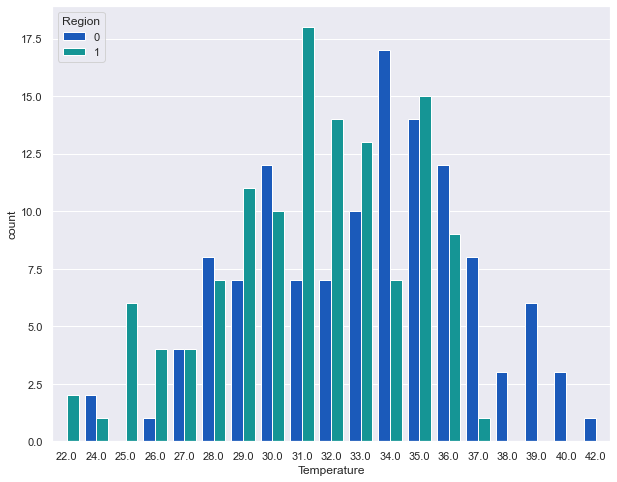

In [303]:
sn.countplot(x='Temperature',hue='Region',data=data_copy_nodate,palette='winter')

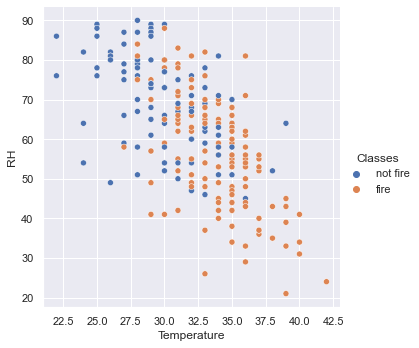

In [154]:
sn.relplot(data=data_copy_nodate,x='Temperature',y='RH',hue='Classes')

In [ ]:
# Most of the fire incidents happend when RH is 40 or below with the temperature from 30c to 40c

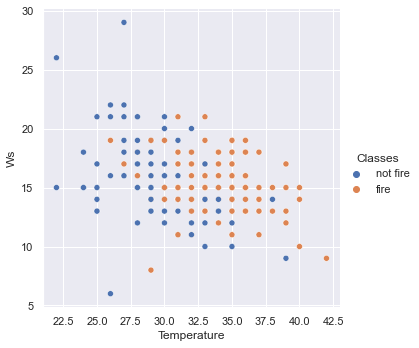

In [155]:
sn.relplot(data=data_copy_nodate,x='Temperature',y='Ws',hue='Classes')

In [302]:
#for feature in data_copy_nodate:
#    if feature !='Region' or 'Classes':
#        data_graph=data_copy_nodate.copy()
#        data_graph.groupby('Classes')[feature].median().plot.bar()
#        plt.xlabel('Classes')
#        plt.ylabel(feature)
#        plt.title(feature)
#        plt.show()

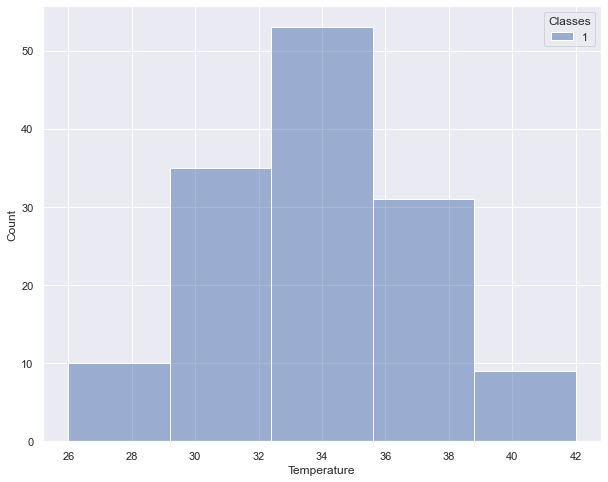

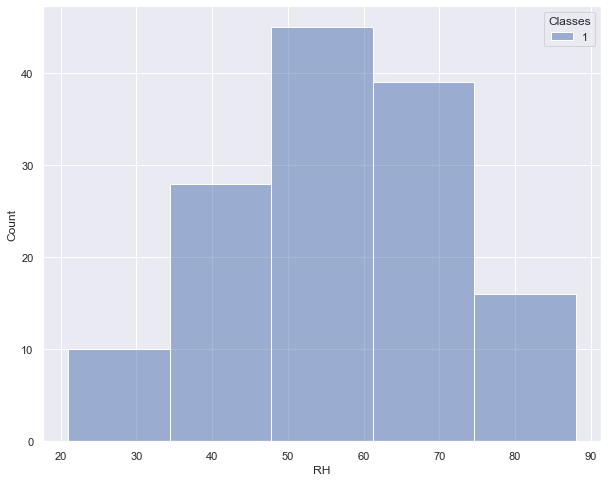

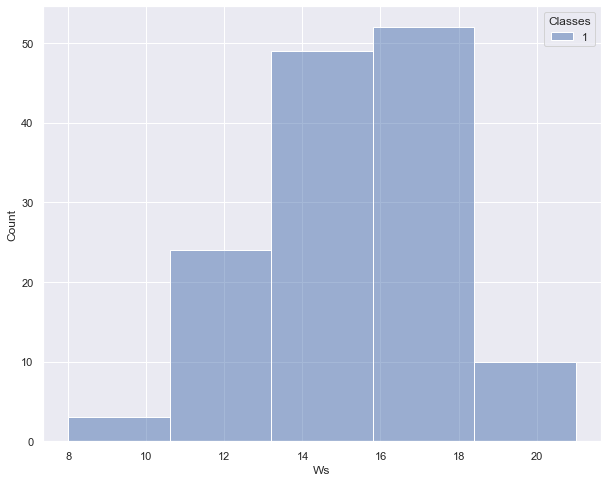

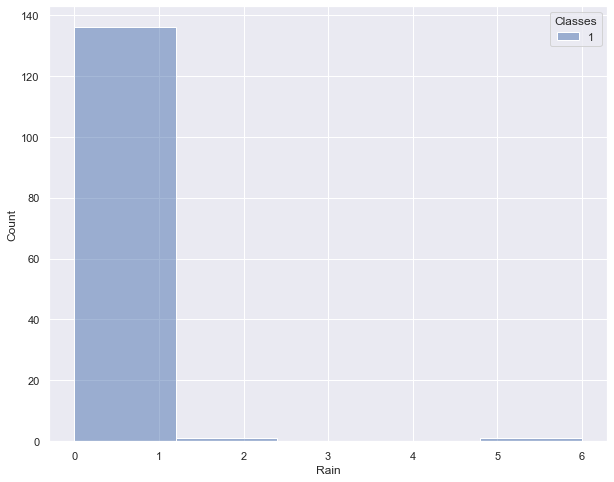

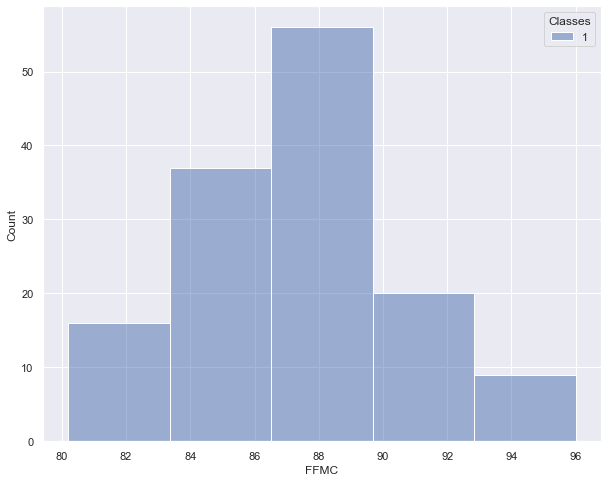

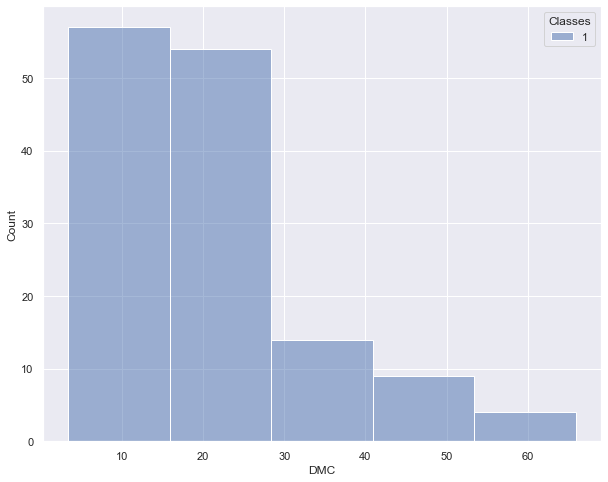

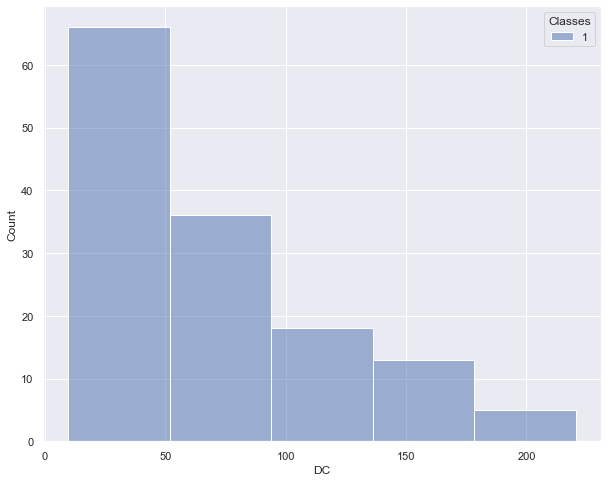

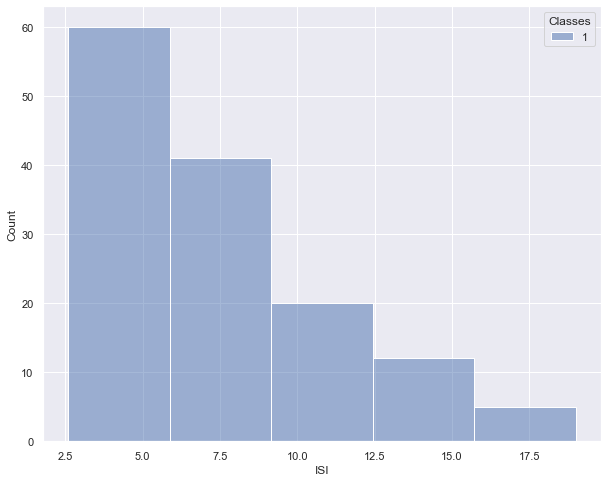

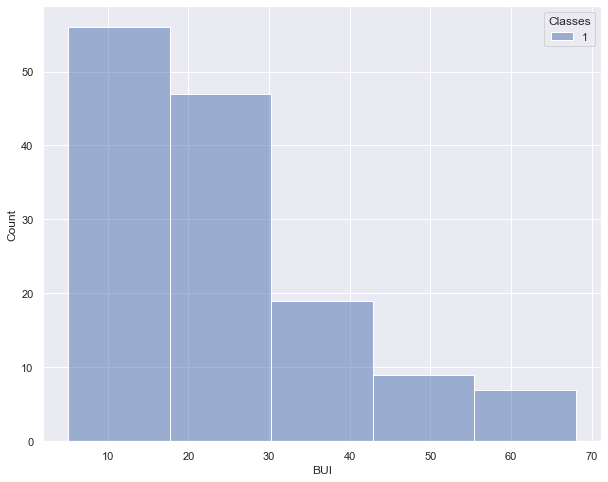

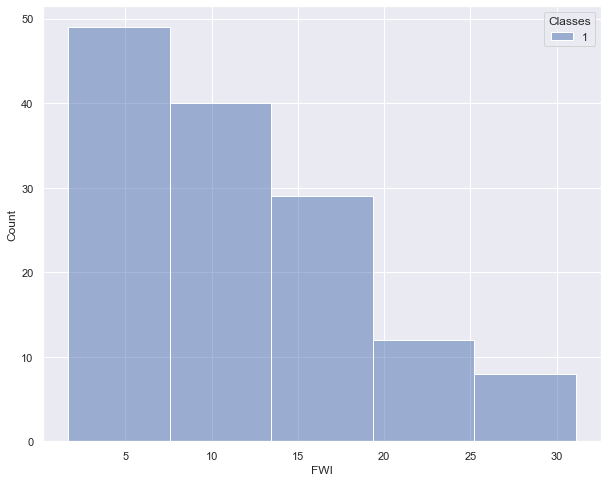

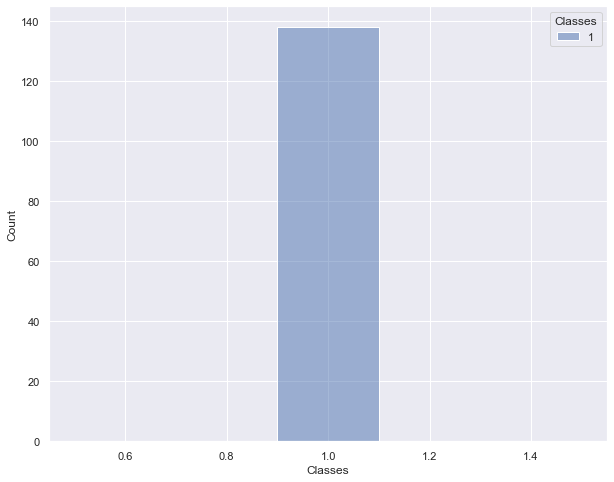

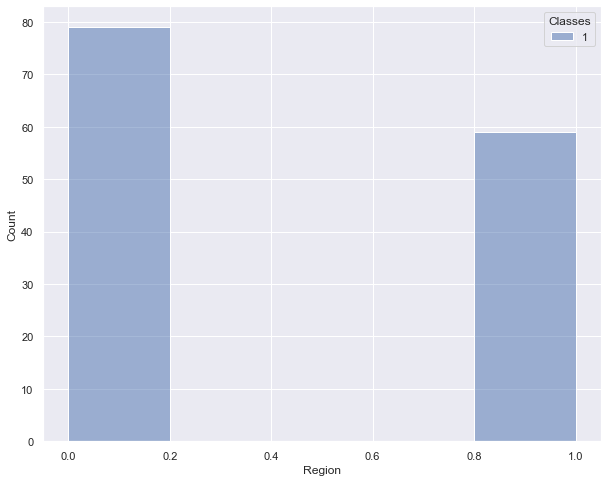

In [301]:
#When its fire what is the temperature
for feature in data_copy_nodate:
    if feature !='Region' or 'Classes':
        sn.histplot(data=data_copy_nodate[data_copy_nodate['Classes']=='fire'], x=feature, y=None, hue='Classes', bins=5)
        plt.show()

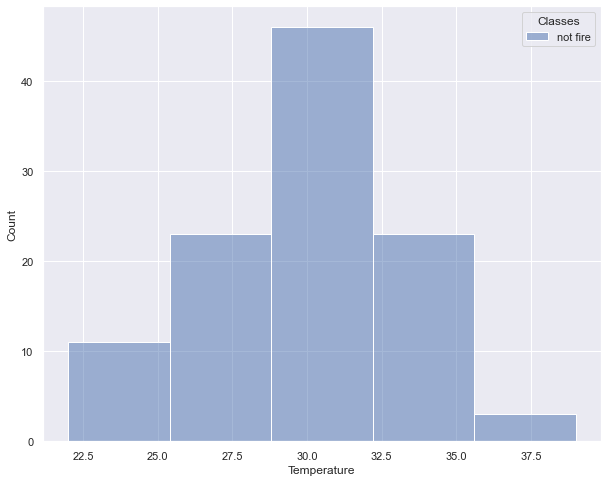

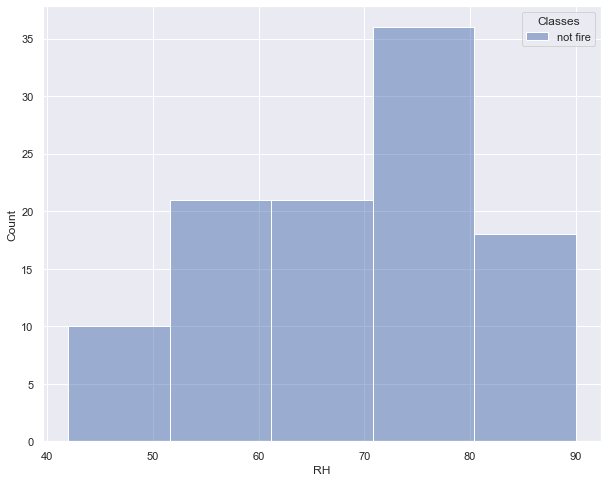

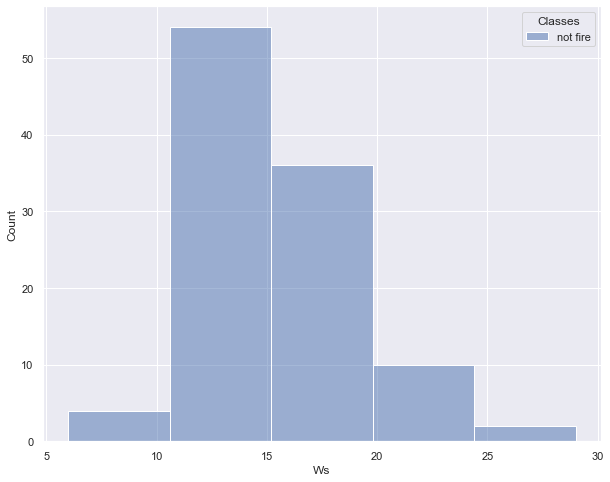

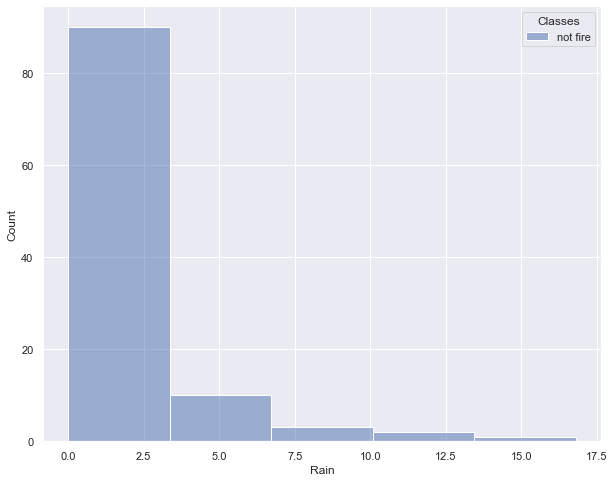

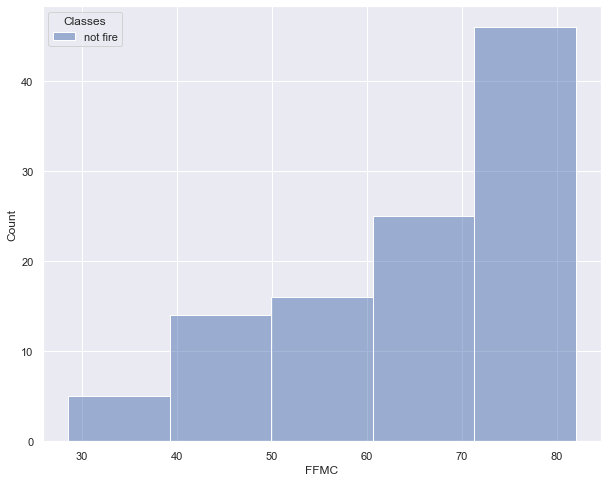

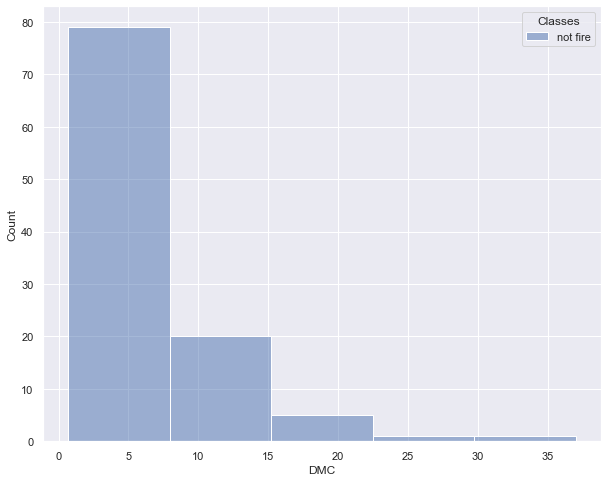

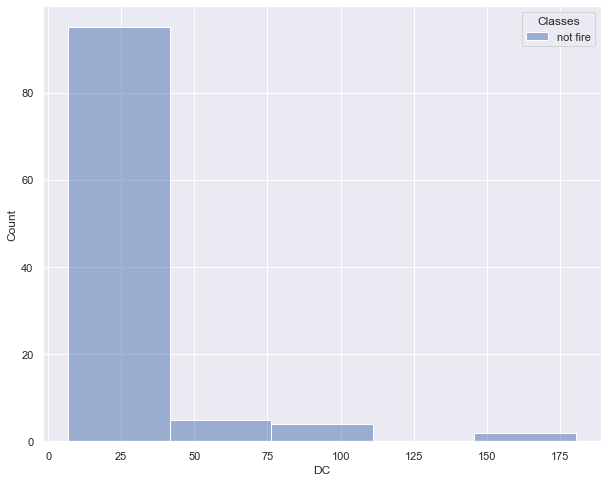

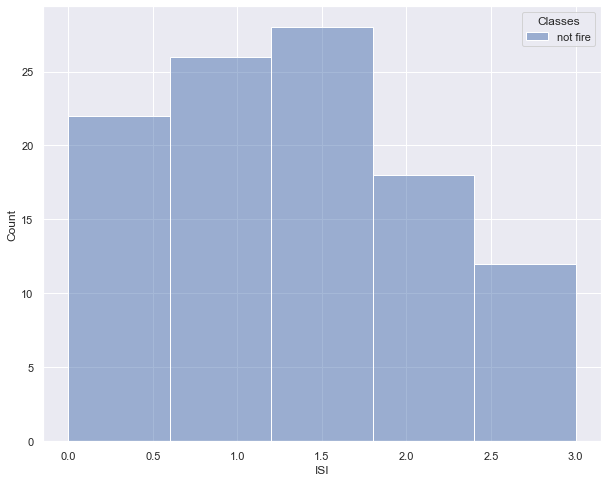

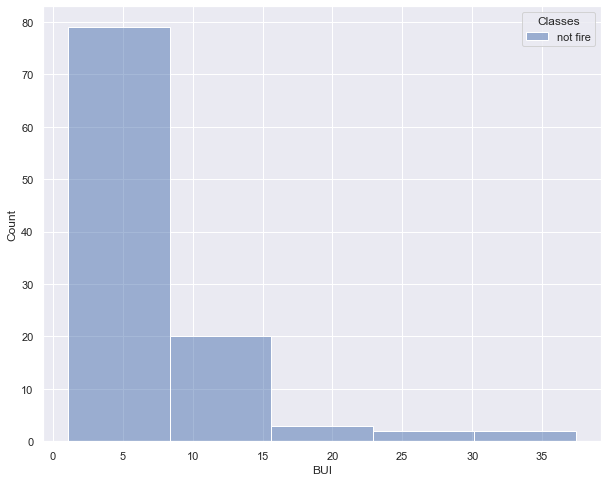

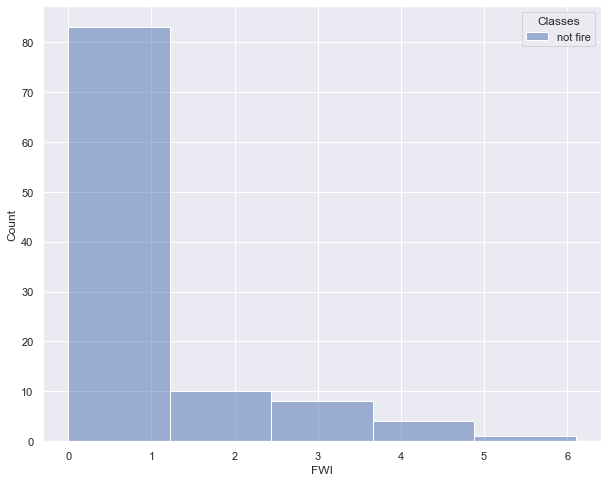

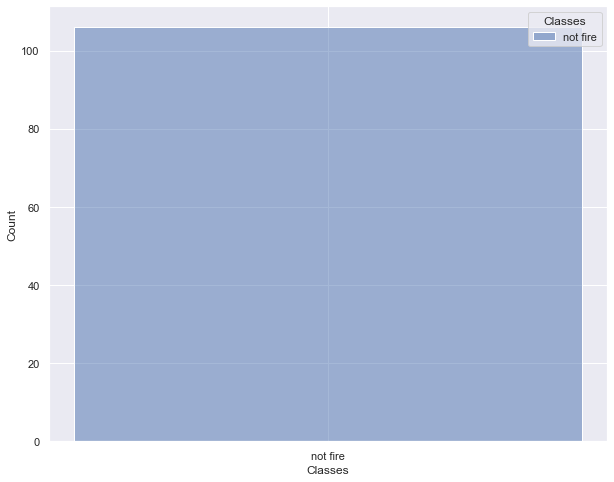

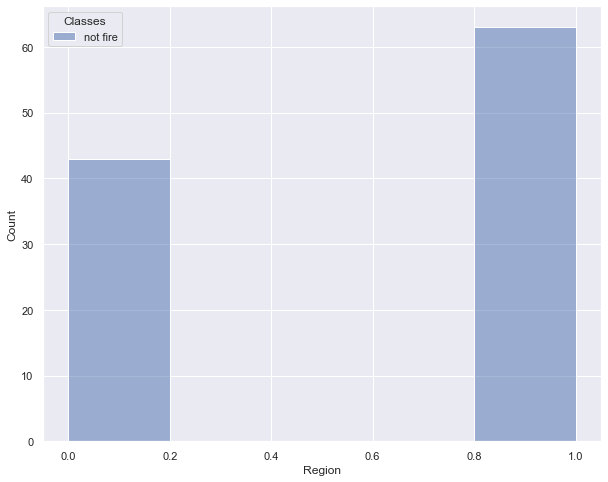

In [164]:
#When its not fire what is the temperature
for feature in data_copy_nodate:
    if feature !='Region' or 'Classes':
        sn.histplot(data=data_copy_nodate[data_copy_nodate['Classes']=='not fire'], x=feature, y=None, hue='Classes', bins=5)
        plt.show()

<AxesSubplot:xlabel='Rain', ylabel='count'>

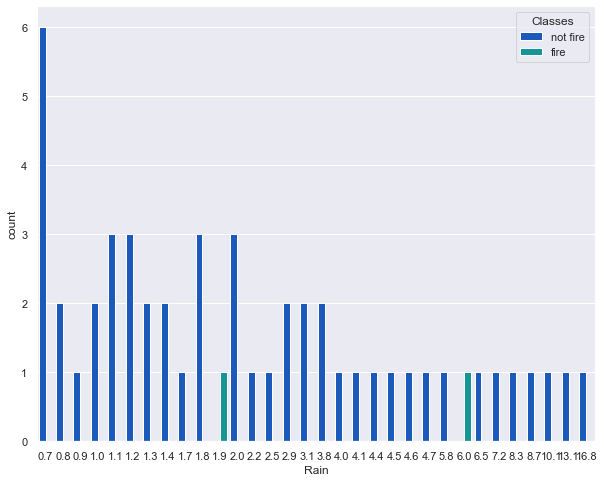

In [184]:
sn.countplot(x='Rain',hue='Classes',data=data_copy_nodate[data_copy_nodate['Rain'] >=0.7],palette='winter')

In [60]:
data_copy_nodate[(data_copy_nodate['Rain'] == 6.0) | (data_copy_nodate['Rain'] == 1.9)]

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
162,35.0,47.0,18.0,6.0,80.8,9.8,9.7,3.1,9.4,3.0,fire,0
163,36.0,43.0,15.0,1.9,82.3,9.4,9.9,3.2,9.0,3.1,fire,0


In [ ]:
#Eventhough considerably more rain fall because of other features value classified as fire 

In [61]:
#Encoding Fire 1 Not Fore 0
#data_copy_nodate['Classes'] = data_copy_nodate.Classes.str.strip()
data_copy_nodate['Classes'] = np.where(data_copy_nodate['Classes']=='fire',1,0)

In [69]:
data_copy_no_region=data_copy_nodate.copy()
data_copy_no_region.drop(['Region'], axis=1,inplace=True)

In [70]:
data_copy_no_region.shape

(244, 11)

In [71]:
X = data_copy_no_region.drop(columns = ['Classes'])
y = data_copy_no_region['Classes']

In [72]:
X.shape

(244, 10)

In [73]:
y.shape

(244,)

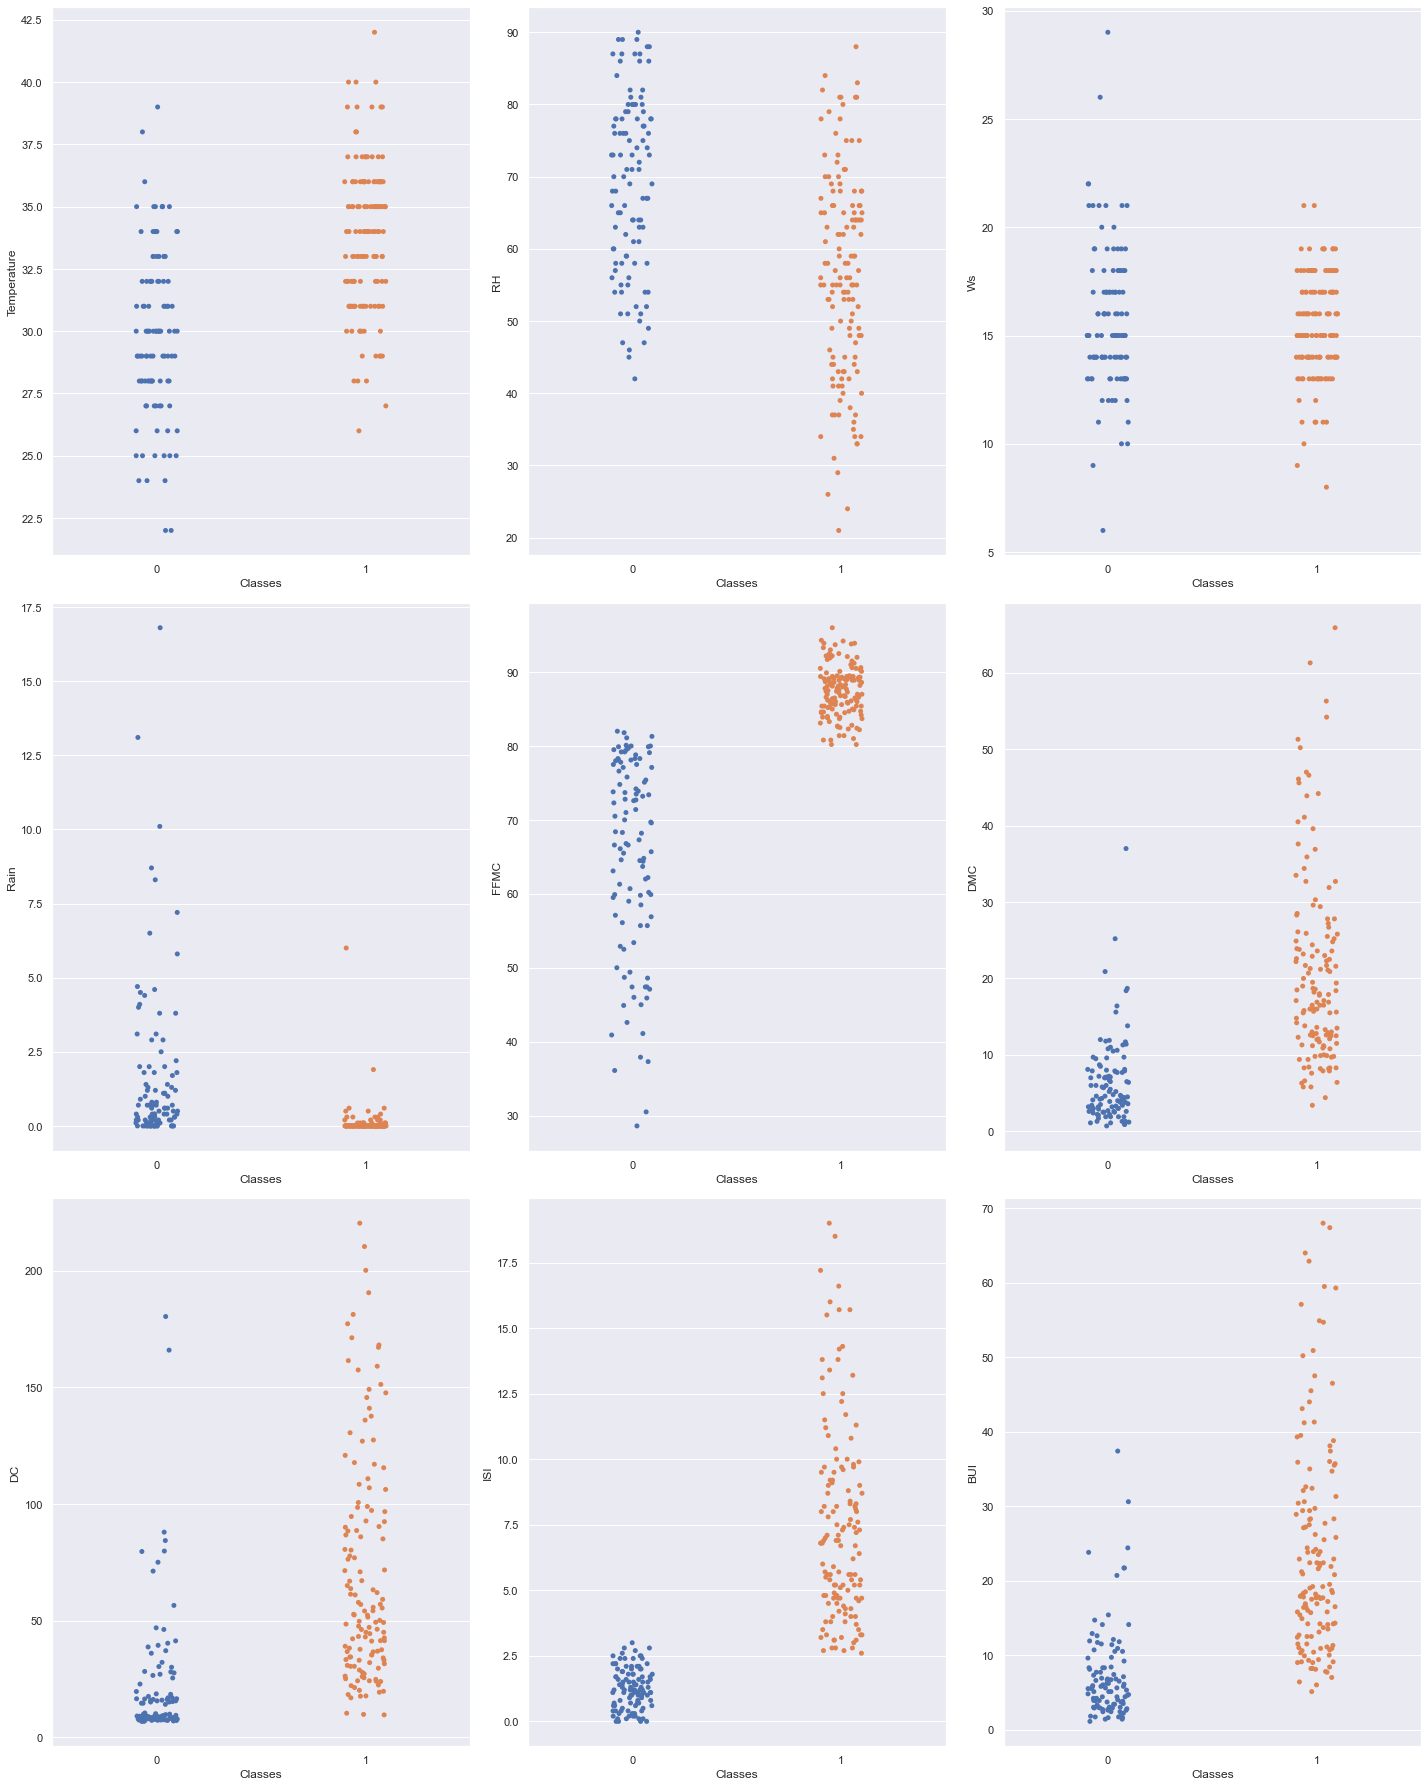

In [74]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sn.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [75]:
# Splitting data into three parts 1) Train 2) Test 3) Unseen
# Train - Test 70:30
# Train - Unseen 90:10

In [142]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [143]:
x_train_tot,x_test,y_train_tot,y_test = train_test_split(X,y, test_size= 0.35, random_state = 365)

In [144]:
x_train_tot.shape

(158, 10)

In [145]:
# Now splitting Train total data set into Train and Unseen

In [146]:
x_train,x_unseen,y_train,y_unseen = train_test_split(x_train_tot,y_train_tot, test_size= 0.09, random_state = 365)

In [ ]:
#LOgistic model built.

In [152]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [153]:
y_pred = log_reg.predict(x_test)

In [154]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9534883720930233

In [155]:
#unseen data test

In [156]:
y_unseen_pred = log_reg.predict(x_unseen)

In [157]:
accuracy = accuracy_score(y_unseen,y_unseen_pred)
accuracy

0.9333333333333333

In [158]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[36,  2],
       [ 2, 46]])

In [166]:
# Confusion Matrix for unseen data
conf_mat_unseen = confusion_matrix(y_unseen,y_unseen_pred)
conf_mat_unseen

array([[ 3,  0],
       [ 1, 11]])

In [167]:
true_positive = conf_mat[1][1]
false_positive = conf_mat[1][0]
false_negative = conf_mat[0][1]
true_negative = conf_mat[0][0]

In [168]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9166666666666666

In [169]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

1.0

In [170]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9565217391304348

In [171]:
###Unseen data Precision, Recall, F1 Score

In [172]:
true_positive = conf_mat_unseen[1][1]
false_positive = conf_mat_unseen[1][0]
false_negative = conf_mat_unseen[0][1]
true_negative = conf_mat_unseen[0][0]

In [173]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9166666666666666

In [174]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

1.0

In [175]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9565217391304348